In [2]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')

In [2]:
# 데이터 불러오기
cust_tr = pd.read_csv('C:/Users/leeji/ML_Session(D&A)/Dataset/cust_train.csv', encoding = 'utf-8') # 회원
product_tr = pd.read_csv('C:/Users/leeji/ML_Session(D&A)/Dataset/product_train.csv',encoding = 'utf-8') # 상품구매
search_tr = pd.read_csv('C:/Users/leeji/ML_Session(D&A)/Dataset/search_train.csv',encoding = 'utf-8') # 검색어
session_tr = pd.read_csv('C:/Users/leeji/ML_Session(D&A)/Dataset/session_train.csv',encoding = 'utf-8') # 세션

In [3]:
cust_te = pd.read_csv('C:/Users/leeji/ML_Session(D&A)/Dataset/sample_submission.csv', encoding = 'utf-8')
product_te = pd.read_csv('C:/Users/leeji/ML_Session(D&A)/Dataset/product_test.csv',encoding = 'utf-8')
search_te = pd.read_csv('C:/Users/leeji/ML_Session(D&A)/Dataset/search_test.csv',encoding = 'utf-8')
session_te = pd.read_csv('C:/Users/leeji/ML_Session(D&A)/Dataset/session_test.csv',encoding = 'utf-8')

In [4]:
master = pd.read_csv('C:/Users/leeji/ML_Session(D&A)/Dataset/master.csv', encoding = 'utf-8') # 상품분류

In [3]:
target = pd.read_csv('C:/Users/leeji/ML_Session(D&A)/Dataset/cust_train.csv')
submission = pd.read_csv('C:/Users/leeji/ML_Session(D&A)/Dataset/sample_submission.csv')

# Basic data preprocessing

In [89]:
train = pd.merge(product_tr, session_tr, on = ['CLNT_ID','SESS_ID'])
train = pd.merge(train, search_tr, on = ['CLNT_ID','SESS_ID'])
train = pd.merge(train, master, on = 'PD_C')

In [90]:
test = pd.merge(product_te, session_te, on = ['CLNT_ID','SESS_ID'])
test = pd.merge(test, search_te, on = ['CLNT_ID','SESS_ID'])
test = pd.merge(test, master, on = 'PD_C')

In [91]:
# 구매금액, 구매수량을 숫자로 변경
train['PD_BUY_AM']  = train['PD_BUY_AM'].map(lambda x: int(str(x).replace(',','')) )
train['PD_BUY_CT']  = train['PD_BUY_CT'].map(lambda x: int(str(x).replace(',','')) )
test['PD_BUY_AM']  = test['PD_BUY_AM'].map(lambda x: int(str(x).replace(',','')) )
test['PD_BUY_CT']  = test['PD_BUY_CT'].map(lambda x: int(str(x).replace(',','')) )

In [24]:
#train = train.merge(target, on='CLNT_ID', how='left')

In [9]:
print(train.shape, target.shape)

(3415963, 21) (263104, 2)


# EDA

In [10]:
import seaborn as sns

target['LABEL'].value_counts()

F30    105052
F40     91098
F20     31094
M40     17371
M30     13950
M20      4539
Name: LABEL, dtype: int64

In [40]:
object_columns = train.dtypes[train.dtypes=='object'].index.tolist()
train[object_columns]

,PD_ADD_NM,PD_BRA_NM,DVC_CTG_NM,ZON_NM,CITY_NM,KWD_NM,PD_NM,CLAC1_NM,CLAC2_NM,CLAC3_NM
0,모델:선택02.CQ2332|사이즈:260 / 1개,아디다스(퍼포먼스),mobile,Seoul,Seoul,여아신발,니짜 6종 택1 (CQ2333 CQ2332 CQ2331 CQ2537 CQ3104 C...,스포츠패션,여성스포츠화,여성런닝/트레이닝화
1,모델:선택02.CQ2332|사이즈:260 / 1개,아디다스(퍼포먼스),mobile,Seoul,Seoul,아디다스키즈,니짜 6종 택1 (CQ2333 CQ2332 CQ2331 CQ2537 CQ3104 C...,스포츠패션,여성스포츠화,여성런닝/트레이닝화
2,모델:선택02.CQ2332|사이즈:260 / 1개,아디다스(퍼포먼스),mobile,Seoul,Seoul,아디다스 바람막이,니짜 6종 택1 (CQ2333 CQ2332 CQ2331 CQ2537 CQ3104 C...,스포츠패션,여성스포츠화,여성런닝/트레이닝화
3,모델:선택02.CQ2332|사이즈:260 / 1개,아디다스(퍼포먼스),mobile,Seoul,Seoul,신발,니짜 6종 택1 (CQ2333 CQ2332 CQ2331 CQ2537 CQ3104 C...,스포츠패션,여성스포츠화,여성런닝/트레이닝화
4,모델:선택02.CQ2332|사이즈:240 / 1개,아디다스(퍼포먼스),mobile,Seoul,Seoul,여아신발,니짜 6종 택1 (CQ2333 CQ2332 CQ2331 CQ2537 CQ3104 C...,스포츠패션,여성스포츠화,여성런닝/트레이닝화
...,...,...,...,...,...,...,...,...,...,...
3415958,색상:검정색|Size:S / 1개,에잇세컨즈,mobile,Seoul,Seoul,에잇세컨즈,여성 [LAB8] 블랙 코튼 오버사이즈 후드 티셔츠 (358941CYB5) - 검정...,남성의류,남성의류상의,남성티셔츠
3415959,색상:검정색|Size:S / 1개,에잇세컨즈,mobile,Seoul,Seoul,쿠폰,여성 [LAB8] 블랙 코튼 오버사이즈 후드 티셔츠 (358941CYB5) - 검정...,남성의류,남성의류상의,남성티셔츠
3415960,색상:네이비|사이즈:66 / 1개,베스띠벨리,mobile,Chungcheongnam-do,Asan-si,올리비아로렌,넥포인트 블라우스 BQB2486 - 네이비 / 55,여성의류,여성의류상의,여성남방셔츠
3415961,색상:그린(GN)|사이즈:66 / 1개,쉬즈미스,mobile,Chungcheongnam-do,Asan-si,올리비아로렌,스트라이프 롤업셔츠(SWWSTH11020) - 그린(GN) / 66,여성의류,여성의류상의,여성남방셔츠


In [33]:
# DVC_CTG_NM, ZON_NM, CITY_NM, KWD_NM
object_columns = train.loc[:, ['CLNT_ID', 'DVC_CTG_NM', 'ZON_NM', 'CITY_NM', 'KWD_NM', 'LABEL']]
object_columns_eda = train.loc[:, ['DVC_CTG_NM', 'ZON_NM', 'CITY_NM', 'KWD_NM']].columns
object_columns_eda

Index(['DVC_CTG_NM', 'ZON_NM', 'CITY_NM', 'KWD_NM'], dtype='object')

column name : DVC_CTG_NM
column name : ZON_NM
column name : CITY_NM
column name : KWD_NM


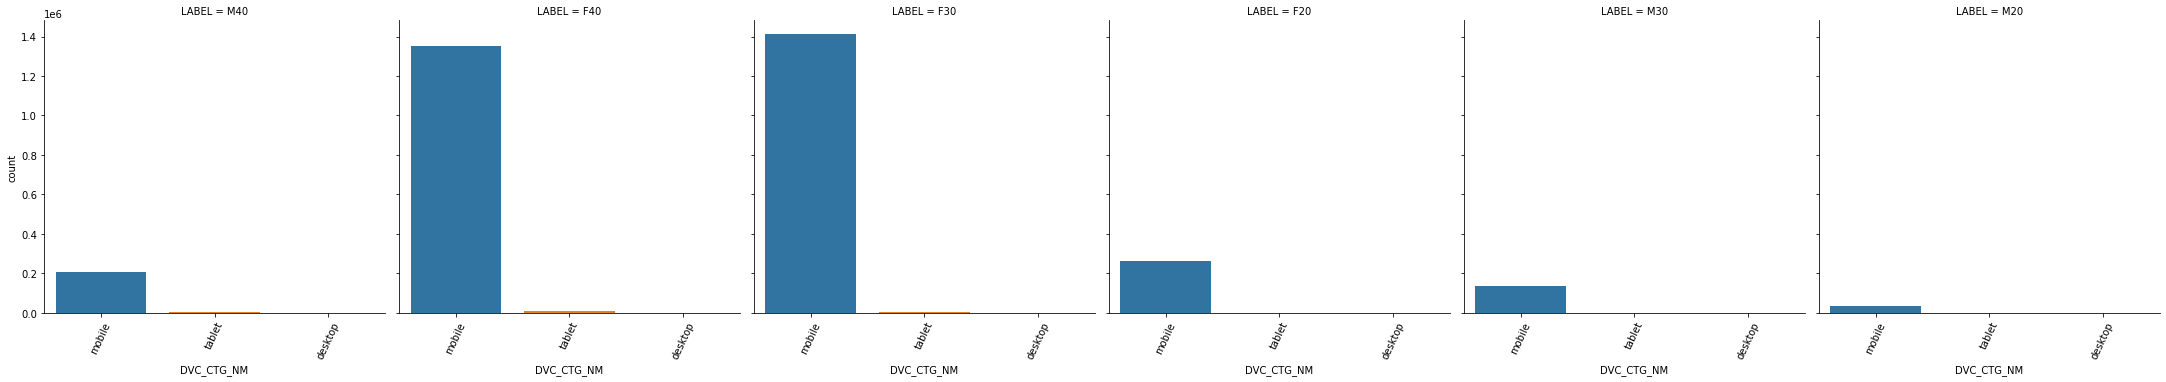

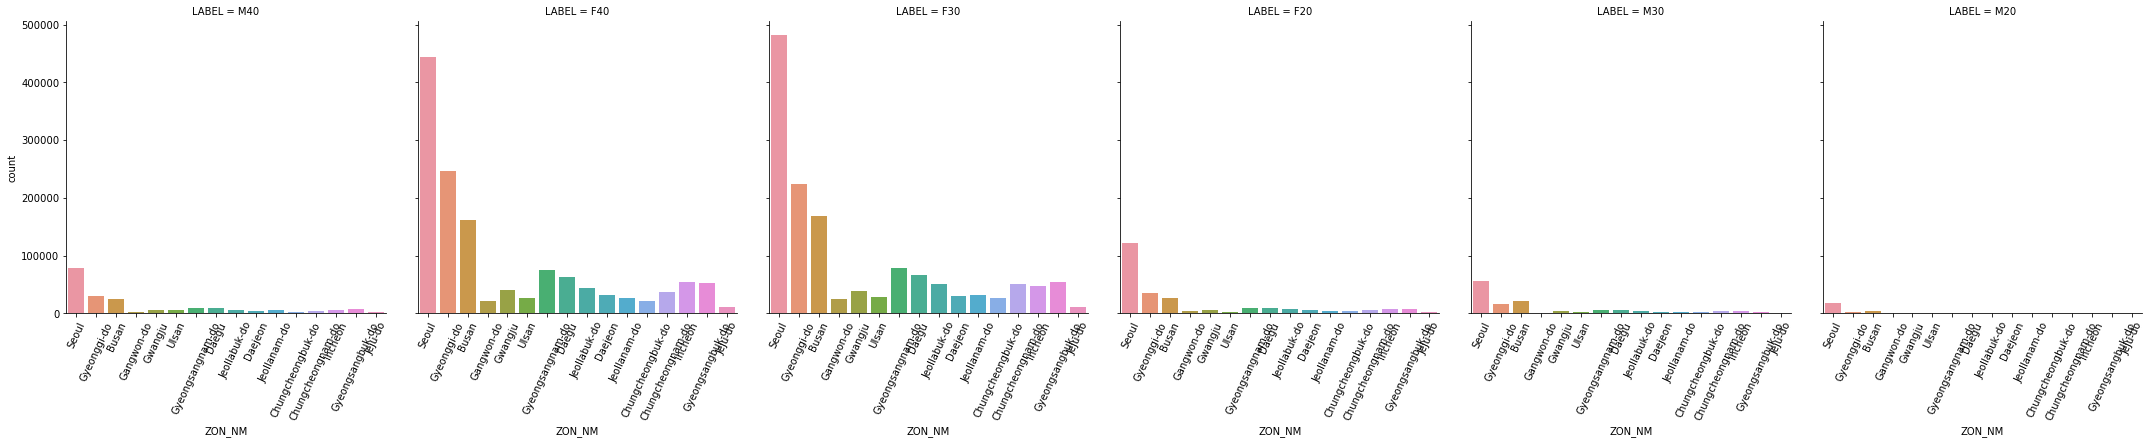

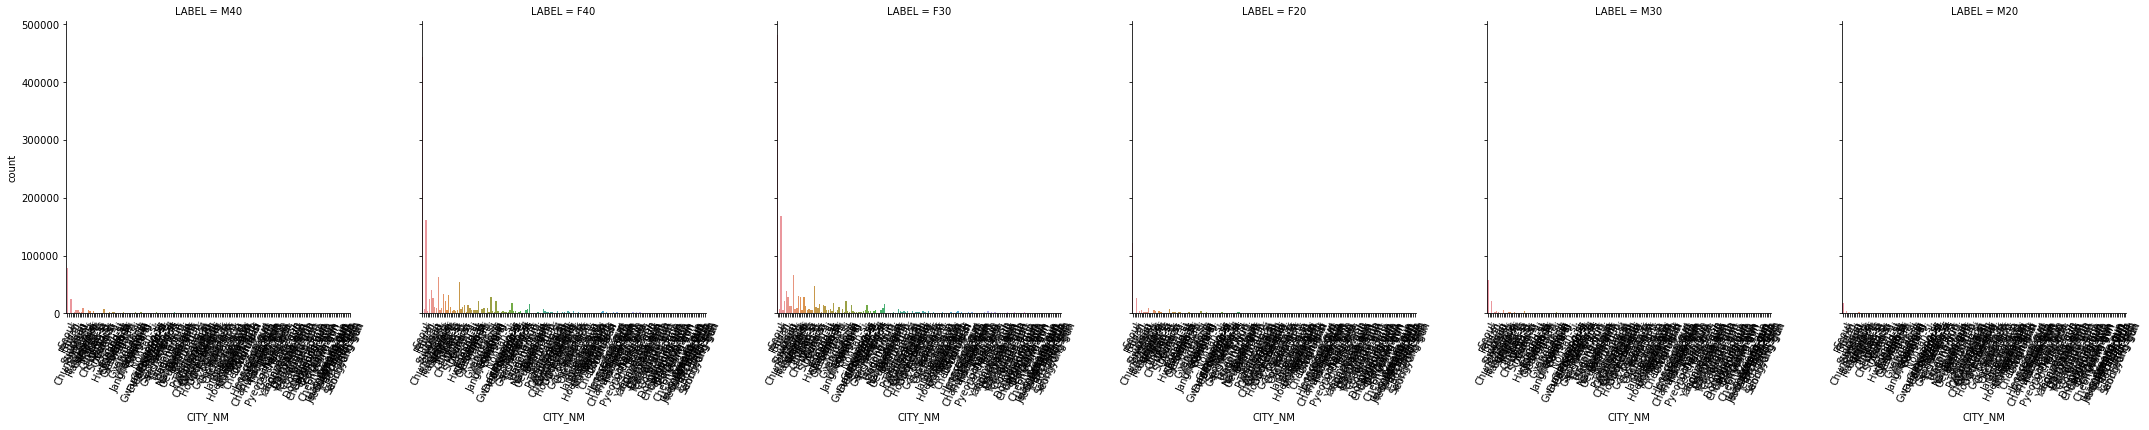

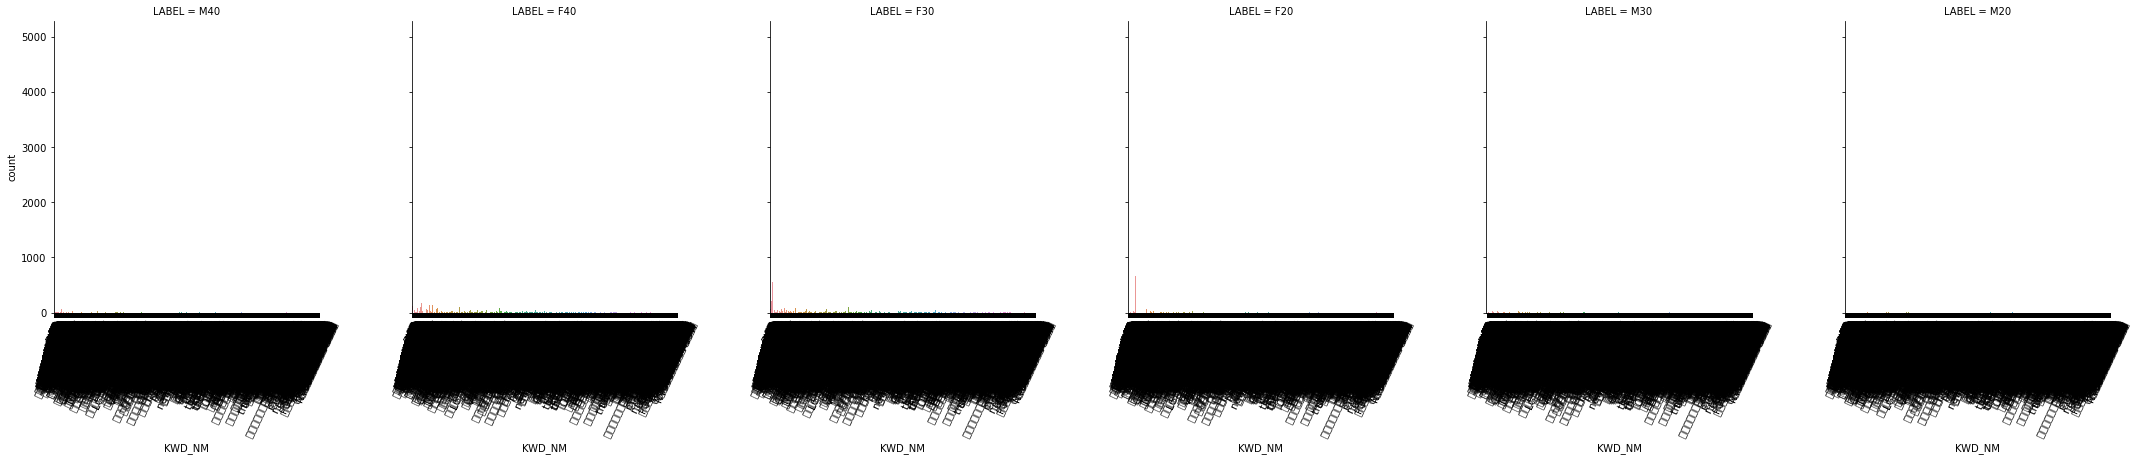

In [34]:
# object 변수와 LABEL 값의 관계
def show_category_by_target(df, columns):
    for column in columns:
        print('column name :', column)
        chart = sns.catplot(x=column, col="LABEL", data=df, kind="count")
        chart.set_xticklabels(rotation=65)
        
show_category_by_target(object_columns, object_columns_eda)

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

num_columns = train.dtypes[train.dtypes != 'object'].index.tolist()
num_columns = [column for column in num_columns if column not in ['CLNT_ID', 'SESS_ID', 'LABEL', 'date', 'HITS_SEQ', 'PD_C']]
num_columns

['PD_BUY_AM',
 'PD_BUY_CT',
 'SESS_SEQ',
 'SESS_DT',
 'TOT_PAG_VIEW_CT',
 'SEARCH_CNT',
 'AMOUNT']

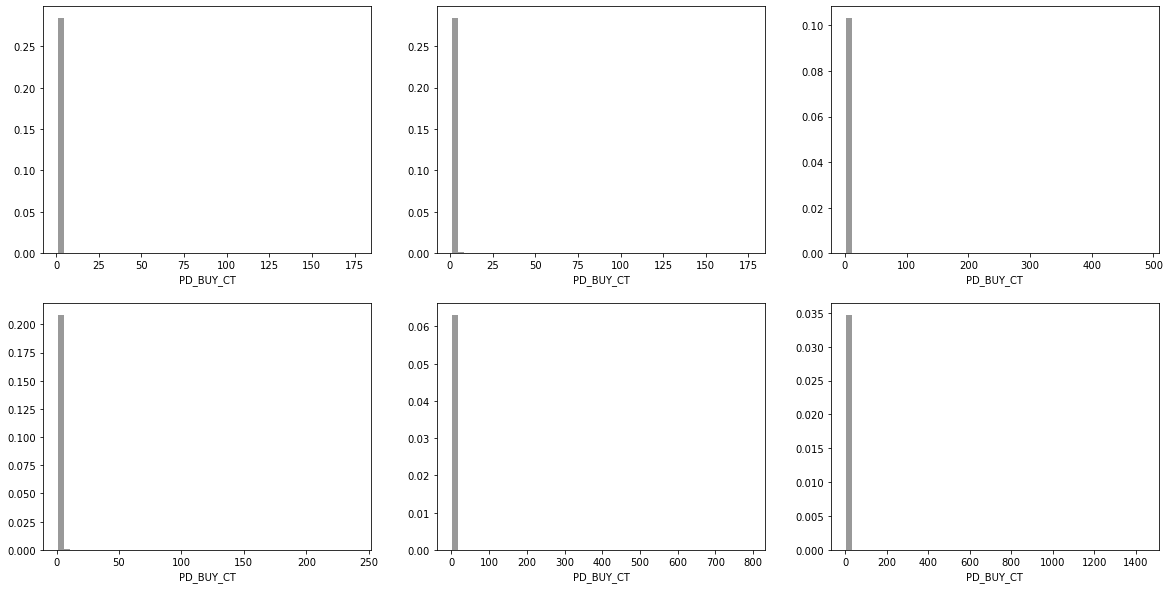

In [59]:
# target과 feature간의 상관관계 분석
def show_column_hist_by_target(df, column):    
    cond_M20 = (df['LABEL'] == 'M20')
    cond_M30 = (df['LABEL'] == 'M30')
    cond_M40 = (df['LABEL'] == 'M40')
    cond_F20 = (df['LABEL'] == 'F20')
    cond_F30 = (df['LABEL'] == 'F30')
    cond_F40 = (df['LABEL'] == 'F40')

    fig, axs = plt.subplots(figsize=(20, 10), nrows=2, ncols=3, squeeze=False)
    
    sns.distplot(df[cond_M20][column], ax=axs[0][0], label='M20', color='k')
    sns.distplot(df[cond_M30][column], ax=axs[0][1], label='M30', color='k')
    sns.distplot(df[cond_M40][column], ax=axs[0][2], label='M40', color='k')
    sns.distplot(df[cond_F20][column], ax=axs[1][0], label='F20', color='k')
    sns.distplot(df[cond_F30][column], ax=axs[1][1], label='F30', color='k')
    sns.distplot(df[cond_F40][column], ax=axs[1][2], label='F40', color='k')

show_column_hist_by_target(train, 'PD_BUY_CT')

# Make features

In [ ]:
# CLNT_ID별로 묶어낼 수 있도록 feature를 만든다.
# categorical feature, numeric feature 등 다양하게 생각해본다.

In [11]:
features = []
features_te = []

In [12]:
train['AMOUNT'] = train['PD_BUY_AM'] * train['PD_BUY_CT']
test['AMOUNT'] = test['PD_BUY_AM'] * test['PD_BUY_CT']

In [13]:
# 총구매액, 구매건수, 평균구매액, 최대구매액
f = train.groupby('CLNT_ID')['AMOUNT'].agg([('총구매액', np.sum),
                                            ('구매건수', np.size),
                                            ('평균구매액', lambda x : np.round(np.mean(x))),
                                            ('최대구매액', np.max)]).reset_index()
features.append(f);display(f)

f_te = test.groupby('CLNT_ID')['AMOUNT'].agg([('총구매액', np.sum),
                                            ('구매건수', np.size),
                                            ('평균구매액', lambda x : np.round(np.mean(x))),
                                            ('최대구매액', np.max)]).reset_index()
features_te.append(f_te) ; display(f_te)

,CLNT_ID,총구매액,구매건수,평균구매액,최대구매액
0,0,86500,2,43250,81000
1,1,1276000,16,79750,99000
2,2,560000,11,50909,62100
3,3,851200,8,106400,110400
4,4,125200,6,20867,37000
...,...,...,...,...,...
263099,263099,973000,112,8688,22000
263100,263100,22400,2,11200,12900
263101,263101,135600,4,33900,33900
263102,263102,59400,15,3960,9720


,CLNT_ID,총구매액,구매건수,평균구매액,최대구매액
0,263104,31600,3,10533,13800
1,263105,314000,4,78500,120000
2,263106,49800,2,24900,29900
3,263107,88000,2,44000,49000
4,263108,124000,1,124000,124000
...,...,...,...,...,...
112755,375859,80000,3,26667,35000
112756,375860,902800,12,75233,149000
112757,375861,91800,2,45900,45900
112758,375862,92000,4,23000,23000


**[주말방문비율]**

In [14]:
train['date'] = pd.to_datetime(train['SESS_DT'], format= '%Y%m%d')
test['date'] = pd.to_datetime(test['SESS_DT'], format= '%Y%m%d')

In [15]:
f = train.groupby('CLNT_ID')['date'].agg([
    ('주말방문비율', lambda x: np.mean(x.dt.dayofweek>4))]).reset_index()
features.append(f); display(f)

f_te = test.groupby('CLNT_ID')['date'].agg([
    ('주말방문비율', lambda x: np.mean(x.dt.dayofweek>4))]).reset_index()
features_te.append(f_te);display(f_te)

,CLNT_ID,주말방문비율
0,0,1.000000
1,1,0.125000
2,2,0.000000
3,3,1.000000
4,4,0.333333
...,...,...
263099,263099,0.000000
263100,263100,0.500000
263101,263101,0.000000
263102,263102,0.000000


,CLNT_ID,주말방문비율
0,263104,0.00
1,263105,0.50
2,263106,1.00
3,263107,0.00
4,263108,1.00
...,...,...
112755,375859,0.00
112756,375860,0.25
112757,375861,0.00
112758,375862,0.00


**[계절방문비율]**

In [16]:
f = train.groupby('CLNT_ID')['date'].agg([
    ('봄-구매비율', lambda x: np.mean(x.dt.month.isin([3,4,5]))),
    ('여름-구매비율', lambda x: np.mean(x.dt.month.isin([6,7,8]))),
    ('가을-구매비율', lambda x: np.mean(x.dt.month.isin([9,10,11]))),
    ('겨울-구매비율', lambda x: np.mean(x.dt.month.isin([1,2,12])))
]).reset_index()
features.append(f); f

,CLNT_ID,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율
0,0,0.000000,1.000000,0.000000,0.0
1,1,0.375000,0.625000,0.000000,0.0
2,2,0.000000,0.909091,0.090909,0.0
3,3,0.000000,0.000000,1.000000,0.0
4,4,0.666667,0.333333,0.000000,0.0
...,...,...,...,...,...
263099,263099,0.000000,1.000000,0.000000,0.0
263100,263100,0.500000,0.500000,0.000000,0.0
263101,263101,1.000000,0.000000,0.000000,0.0
263102,263102,1.000000,0.000000,0.000000,0.0


In [17]:
f_te = test.groupby('CLNT_ID')['date'].agg([
    ('봄-구매비율', lambda x: np.mean(x.dt.month.isin([3,4,5]))),
    ('여름-구매비율', lambda x: np.mean(x.dt.month.isin([6,7,8]))),
    ('가을-구매비율', lambda x: np.mean(x.dt.month.isin([9,10,11]))),
    ('겨울-구매비율', lambda x: np.mean(x.dt.month.isin([1,2,12])))
]).reset_index()
features_te.append(f_te); f_te

,CLNT_ID,봄-구매비율,여름-구매비율,가을-구매비율,겨울-구매비율
0,263104,0.000000,1.000000,0.0,0.0
1,263105,0.000000,1.000000,0.0,0.0
2,263106,0.000000,1.000000,0.0,0.0
3,263107,1.000000,0.000000,0.0,0.0
4,263108,0.000000,1.000000,0.0,0.0
...,...,...,...,...,...
112755,375859,1.000000,0.000000,0.0,0.0
112756,375860,0.583333,0.416667,0.0,0.0
112757,375861,0.000000,1.000000,0.0,0.0
112758,375862,0.000000,1.000000,0.0,0.0


**[mobile count]**
##### 여성이 mobile 비율이 높음

In [18]:
f = train.groupby(['CLNT_ID', 'DVC_CTG_NM'])['CLNT_ID'].count().unstack()
f = f.fillna(0)
f = f.reset_index()
features.append(f); f

DVC_CTG_NM,CLNT_ID,desktop,mobile,tablet
0,0,0.0,2.0,0.0
1,1,0.0,16.0,0.0
2,2,0.0,11.0,0.0
3,3,0.0,8.0,0.0
4,4,0.0,6.0,0.0
...,...,...,...,...
263099,263099,0.0,112.0,0.0
263100,263100,0.0,2.0,0.0
263101,263101,0.0,4.0,0.0
263102,263102,0.0,15.0,0.0


In [19]:
f_te = test.groupby(['CLNT_ID', 'DVC_CTG_NM'])['CLNT_ID'].count().unstack()
f_te = f_te.fillna(0)
f_te = f_te.reset_index()
features_te.append(f_te); f_te

DVC_CTG_NM,CLNT_ID,desktop,mobile,tablet
0,263104,0.0,3.0,0.0
1,263105,0.0,4.0,0.0
2,263106,0.0,2.0,0.0
3,263107,0.0,2.0,0.0
4,263108,0.0,1.0,0.0
...,...,...,...,...
112755,375859,0.0,3.0,0.0
112756,375860,0.0,12.0,0.0
112757,375861,0.0,2.0,0.0
112758,375862,0.0,4.0,0.0


**[TOT_SESS_HR_V_agg]**

In [20]:
#train['TOT_SESS_HR_V'] = train['TOT_SESS_HR_V'].str.replace(',', '').astype('int')
#test['TOT_SESS_HR_V'] = test['TOT_SESS_HR_V'].str.replace(',', '').astype('int')

In [21]:
f = train.groupby('CLNT_ID')['TOT_SESS_HR_V'].agg([np.mean, max, sum])
f.columns = ['TOT_SESS_HR_V_'+('_').join(column).upper() for column in f.columns.ravel()]
f = f.reset_index()
features.append(f); f

,CLNT_ID,TOT_SESS_HR_V_M_E_A_N,TOT_SESS_HR_V_M_A_X,TOT_SESS_HR_V_S_U_M
0,0,922.000000,922,1844
1,1,1385.000000,3063,22160
2,2,4385.545455,4787,48241
3,3,1051.000000,1051,8408
4,4,699.666667,792,4198
...,...,...,...,...
263099,263099,3890.000000,3890,435680
263100,263100,1474.500000,2497,2949
263101,263101,1789.000000,1789,7156
263102,263102,1812.000000,1812,27180


In [22]:
f_te = test.groupby('CLNT_ID')['TOT_SESS_HR_V'].agg([np.mean, max, sum])
f_te.columns = ['TOT_SESS_HR_V_'+('_').join(column).upper() for column in f_te.columns.ravel()]
f_te = f_te.reset_index()
features_te.append(f_te); f_te

,CLNT_ID,TOT_SESS_HR_V_M_E_A_N,TOT_SESS_HR_V_M_A_X,TOT_SESS_HR_V_S_U_M
0,263104,688.0,688,2064
1,263105,2684.0,3206,10736
2,263106,1825.0,1825,3650
3,263107,613.0,834,1226
4,263108,618.0,618,618
...,...,...,...,...
112755,375859,1286.0,1286,3858
112756,375860,1321.0,2399,15852
112757,375861,1740.0,1740,3480
112758,375862,2146.0,2146,8584


**[TOT_SESS_HR_V / TOP_PAG_VIEW_CT]**

In [23]:
train['TOP_PAG_VIEW_RATIO'] = train['TOT_SESS_HR_V'] / train['TOT_PAG_VIEW_CT']
test['TOP_PAG_VIEW_RATIO'] = test['TOT_SESS_HR_V'] / test['TOT_PAG_VIEW_CT']

In [24]:
f = train.groupby('CLNT_ID')['TOP_PAG_VIEW_RATIO'].agg([np.mean, max])
f.columns = ['TOP_PAG_VIEW_RATIO_'+('_').join(column).upper() for column in f.columns.ravel()]
f = f.reset_index()
features.append(f); f

,CLNT_ID,TOP_PAG_VIEW_RATIO_M_E_A_N,TOP_PAG_VIEW_RATIO_M_A_X
0,0,15.627119,15.627119
1,1,10.575642,23.204545
2,2,15.834323,16.855634
3,3,11.301075,11.301075
4,4,12.546595,14.666667
...,...,...,...
263099,263099,14.197080,14.197080
263100,263100,12.349359,16.006410
263101,263101,22.935897,22.935897
263102,263102,9.638298,9.638298


In [25]:
f_te = test.groupby('CLNT_ID')['TOP_PAG_VIEW_RATIO'].agg([np.mean, max])
f_te.columns = ['TOP_PAG_VIEW_RATIO_'+('_').join(column).upper() for column in f_te.columns.ravel()]
f_te = f_te.reset_index()
features_te.append(f_te); f_te

,CLNT_ID,TOP_PAG_VIEW_RATIO_M_E_A_N,TOP_PAG_VIEW_RATIO_M_A_X
0,263104,15.636364,15.636364
1,263105,13.573067,19.197605
2,263106,19.010417,19.010417
3,263107,8.624545,8.909091
4,263108,6.866667,6.866667
...,...,...,...
112755,375859,9.669173,9.669173
112756,375860,17.750960,44.133333
112757,375861,18.709677,18.709677
112758,375862,25.247059,25.247059


**[CLAC1_NM 인코딩]**

In [26]:
f = train.groupby('CLNT_ID')['CLAC1_NM'].agg([('CLAC1_NM_','value_counts')])
f = pd.pivot_table(f, index = 'CLNT_ID', columns = 'CLAC1_NM', values = 'CLAC1_NM_', fill_value = 0)
f.columns = ['CLAC1_NM_'+('_').join(column).upper() for column in f.columns.ravel()]
f = f.reset_index()
features.append(f);f

,CLNT_ID,CLAC1_NM_가_구,CLAC1_NM_건_강_식_품,CLAC1_NM_계_절_가_전,CLAC1_NM_과_일,CLAC1_NM_구_기_/_필_드_스_포_츠,CLAC1_NM_남_성_의_류,CLAC1_NM_냉_동_식_품,CLAC1_NM_냉_장_/_세_탁_가_전,CLAC1_NM_냉_장_식_품,...,CLAC1_NM_주_방_잡_화,CLAC1_NM_청_소_/_세_탁_/_욕_실_용_품,CLAC1_NM_축_산_물,CLAC1_NM_출_산_/_육_아_용_품,CLAC1_NM_침_구_/_수_예,CLAC1_NM_컴_퓨_터,CLAC1_NM_패_션_잡_화,CLAC1_NM_퍼_스_널_케_어,CLAC1_NM_헬_스_/_피_트_니_스,CLAC1_NM_화_장_품_/_뷰_티_케_어
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,0,0,0
4,4,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263099,263099,0,0,0,0,0,112,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263100,263100,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263101,263101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263102,263102,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
f_te = test.groupby('CLNT_ID')['CLAC1_NM'].agg([('CLAC1_NM_', 'value_counts')])
f_te = pd.pivot_table(f_te, index = 'CLNT_ID', columns = 'CLAC1_NM', values = 'CLAC1_NM_', fill_value = 0)
f_te.columns = ['CLAC1_NM_'+('_').join(column).upper() for column in f_te.columns.ravel()]
f_te = f_te.reset_index()
features_te.append(f_te);f_te

,CLNT_ID,CLAC1_NM_가_구,CLAC1_NM_건_강_식_품,CLAC1_NM_계_절_가_전,CLAC1_NM_과_일,CLAC1_NM_구_기_/_필_드_스_포_츠,CLAC1_NM_남_성_의_류,CLAC1_NM_냉_동_식_품,CLAC1_NM_냉_장_/_세_탁_가_전,CLAC1_NM_냉_장_식_품,...,CLAC1_NM_주_방_잡_화,CLAC1_NM_청_소_/_세_탁_/_욕_실_용_품,CLAC1_NM_축_산_물,CLAC1_NM_출_산_/_육_아_용_품,CLAC1_NM_침_구_/_수_예,CLAC1_NM_컴_퓨_터,CLAC1_NM_패_션_잡_화,CLAC1_NM_퍼_스_널_케_어,CLAC1_NM_헬_스_/_피_트_니_스,CLAC1_NM_화_장_품_/_뷰_티_케_어
0,263104,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,0,1
1,263105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,263106,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,263107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,263108,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112755,375859,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
112756,375860,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112757,375861,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112758,375862,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**[CLAC2_NM 인코딩]**

In [30]:
f = train.groupby('CLNT_ID')['CLAC2_NM'].agg([('CLAC2_NM_','value_counts')])
f = pd.pivot_table(f, index = 'CLNT_ID', columns = 'CLAC2_NM', values = 'CLAC2_NM_', fill_value = 0)
f.columns = ['CLAC2_NM_'+('_').join(column).upper() for column in f.columns.ravel()]
f = f.reset_index()
features.append(f);f

,CLNT_ID,CLAC2_NM_T_V,CLAC2_NM_거_실_가_구,CLAC2_NM_건_강_보_조_식_품,CLAC2_NM_건_강_진_액,CLAC2_NM_견_과_류,CLAC2_NM_고_양_이_용_품,CLAC2_NM_골_프,CLAC2_NM_공_기_청_정_/_가_습_/_제_습,CLAC2_NM_교_육_완_구,...,CLAC2_NM_패_션_액_세_서_리,CLAC2_NM_포_장_반_찬,CLAC2_NM_피_트_니_스,CLAC2_NM_필_기_도_구,CLAC2_NM_핸_드_/_풋_케_어,CLAC2_NM_향_수,CLAC2_NM_헤_어_케_어,CLAC2_NM_홈_웨_어,CLAC2_NM_홍_삼_/_인_삼_가_공_식_품,CLAC2_NM_화_장_지_/_티_슈
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263099,263099,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263100,263100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263101,263101,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263102,263102,0,0,0,0,0,0,0,0,0,...,0,0,0,15,0,0,0,0,0,0


In [31]:
f_te = test.groupby('CLNT_ID')['CLAC2_NM'].agg([('CLAC2_NM_', 'value_counts')])
f_te = pd.pivot_table(f_te, index = 'CLNT_ID', columns = 'CLAC2_NM', values = 'CLAC2_NM_', fill_value = 0)
f_te.columns = ['CLAC2_NM_'+('_').join(column).upper() for column in f_te.columns.ravel()]
f_te = f_te.reset_index()
features_te.append(f_te);f_te

,CLNT_ID,CLAC2_NM_T_V,CLAC2_NM_거_실_가_구,CLAC2_NM_건_강_보_조_식_품,CLAC2_NM_건_강_진_액,CLAC2_NM_견_과_류,CLAC2_NM_고_양_이_용_품,CLAC2_NM_골_프,CLAC2_NM_공_기_청_정_/_가_습_/_제_습,CLAC2_NM_교_육_완_구,...,CLAC2_NM_패_션_액_세_서_리,CLAC2_NM_포_장_반_찬,CLAC2_NM_피_트_니_스,CLAC2_NM_필_기_도_구,CLAC2_NM_핸_드_/_풋_케_어,CLAC2_NM_향_수,CLAC2_NM_헤_어_케_어,CLAC2_NM_홈_웨_어,CLAC2_NM_홍_삼_/_인_삼_가_공_식_품,CLAC2_NM_화_장_지_/_티_슈
0,263104,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
1,263105,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,263106,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,263107,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,263108,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112755,375859,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112756,375860,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112757,375861,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112758,375862,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**[기존칼럼 agg]**

In [99]:
numeric_columns = train.dtypes[train.dtypes != 'object'].index.tolist()
train[numeric_columns]

,CLNT_ID,SESS_ID,HITS_SEQ,PD_C,PD_BUY_AM,PD_BUY_CT,SESS_SEQ,SESS_DT,TOT_PAG_VIEW_CT,SEARCH_CNT
0,128408,8274151,356,283756,42500,1,19,20180515,357.0,1
1,128408,8274151,356,283756,42500,1,19,20180515,357.0,1
2,128408,8274151,356,283756,42500,1,19,20180515,357.0,1
3,128408,8274151,356,283756,42500,1,19,20180515,357.0,1
4,128408,8274151,356,283756,42500,1,19,20180515,357.0,1
...,...,...,...,...,...,...,...,...,...,...
3415958,175360,857913,56,25522,39900,1,46,20180916,72.0,1
3415959,175360,857913,56,25522,39900,1,46,20180916,72.0,1
3415960,180188,10554141,109,491849,39000,1,5,20180407,112.0,1
3415961,180188,10554141,109,394319,39000,1,5,20180407,112.0,1


# Merge features

In [75]:
# CLNT_ID별로 묶일 수 있게 feature를 만든다.
data = pd.DataFrame({'CLNT_ID': np.arange(0,263103)})
for f in features :
    data = pd.merge(data, f, how='left', on='CLNT_ID')
    
data = data.fillna(0)

In [76]:
data_te = pd.DataFrame({'CLNT_ID': np.arange(263104,375864)})
for f in features_te :
    data_te = pd.merge(data_te, f, how='left', on='CLNT_ID')
    
data_te = data_te.fillna(0)

In [4]:
data = pd.read_csv('data.csv', encoding = 'utf-8')
data_te = pd.read_csv('data_te.csv', encoding = 'utf-8')

In [9]:
# train과 target 병합
data = pd.merge(data, target) ; data

,CLNT_ID,CLNT_ID_COUNT,PD_BUY_AM_MIN,PD_BUY_AM_MAX,PD_BUY_AM_MEAN,AMOUNT_MIN,AMOUNT_MAX,AMOUNT_MEAN,AMOUNT_SIZE,TOT_PAG_VIEW_CT_MIN,...,21_y,22_y,23_y,24_y,25_y,26_y,27_y,28_y,29_y,LABEL
0,0,2,5500,81000,43250.000000,5500,81000,43250.000000,2,59.0,...,-0.553982,0.085496,0.054658,0.066696,0.525620,-0.213618,-0.330886,-0.933183,-0.213916,F20
1,1,16,39000,99000,79750.000000,39000,99000,79750.000000,16,102.0,...,0.259904,0.005754,0.237722,0.062785,0.304413,-0.515806,-0.384422,-0.950576,-0.386727,F30
2,2,11,10000,62100,50000.000000,20000,62100,50909.090909,11,66.0,...,0.246978,-0.155359,0.742120,-0.017660,-0.098517,-0.315783,-0.604870,-0.683442,-0.134126,F30
3,3,8,102400,110400,106400.000000,102400,110400,106400.000000,8,93.0,...,0.230501,0.048487,0.962304,0.662104,0.182125,-0.120211,-1.180008,-1.113791,-0.203968,F20
4,4,6,12800,37000,20866.666667,12800,37000,20866.666667,6,54.0,...,-0.225230,-0.609225,0.313981,0.484957,0.311013,-0.825704,0.091855,-1.110393,0.134359,F20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263099,263099,112,7000,22000,8687.500000,7000,22000,8687.500000,112,274.0,...,0.124143,0.193451,0.420183,0.566984,0.166758,-0.547467,-0.343321,-0.260982,0.205823,M30
263100,263100,2,9500,12900,11200.000000,9500,12900,11200.000000,2,52.0,...,-0.065327,-0.424088,0.252550,0.759394,0.012310,-0.579966,-0.107126,-0.478623,0.163215,F40
263101,263101,4,33900,33900,33900.000000,33900,33900,33900.000000,4,78.0,...,0.117472,0.002380,0.589502,0.024493,0.152416,-0.497845,-0.750108,-0.172833,-0.468597,F40
263102,263102,15,1080,1080,1080.000000,1080,9720,3960.000000,15,188.0,...,0.151096,-0.416151,0.352605,0.611905,0.168816,-0.104630,-0.313927,-0.822074,-0.421846,F30


# Scaling

In [15]:
# 로그변환, 정규화, 표준화 ...

# Feature selection

In [6]:
# permutation importance를 활용한 피처 선택
from sklearn.linear_model import LogisticRegression
from eli5.sklearn import PermutationImportance
import eli5
from tqdm import tqdm
from sklearn.model_selection import StratifiedKFold, cross_val_score
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier

%matplotlib inline

In [10]:
ftr = data.drop(['CLNT_ID', 'LABEL'], axis=1)
target = data['LABEL']

In [7]:
# function
def FeatureSelection(df, target):
    meta = LGBMClassifier(random_state = 0)
    perm = PermutationImportance(meta.fit(df, target)).fit(df, target)
    
    perm_features_df = eli5.explain_weights_df(perm, feature_names = df.columns.tolist())
    perm_features = perm_features_df.loc[perm_features_df['weight'] >= 0.01]['feature'].tolist()
    
    model = LGBMClassifier(random_state = 0)
    cv_scores = []

    sscv = StratifiedKFold(n_splits = 5, random_state = 0)

    for p in tqdm(range(5,100,1)): 
        nf = int(perm_features_df.shape[0] * p * 0.01)
        features_selected = perm_features_df.iloc[:nf].feature
        X_new = df[features_selected]
        cv_score = cross_val_score(model, X_new, target, scoring='neg_log_loss', cv=sscv).mean()
        cv_scores.append((p,cv_score))
        
    best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
    print(best_score)
    plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
    plt.xlabel('Percent of features')
    plt.grid()
    plt.show()
    
    nf = int(perm_features_df.shape[0] * best_score[0] * 0.01)
    return perm_features_df.iloc[:nf].feature

100%|███████████████████████████████████████████████████████████████████████████████| 95/95 [2:56:57<00:00, 111.77s/it]

(55, -1.1741892317328007)


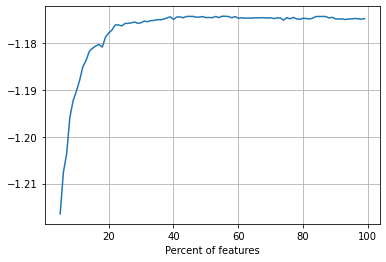

0                          9_y
1                          4_y
2                         24_y
3      TOP_PAG_VIEW_RATIO_MEAN
4                          1_y
                ...           
162                    유아의류아우터
163                      유아동가구
164                      캐쥬얼가방
165                      원예/애완
166                     건강보조식품
Name: feature, Length: 167, dtype: object

In [11]:
FeatureSelection(ftr, target)

# Data split

In [13]:
from sklearn.model_selection import train_test_split
X = data.loc[:, 'CLNT_ID_COUNT' : '29_y']
y = data.LABEL
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

# Modeling

In [14]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(random_state = 0)
rf = RandomForestClassifier(random_state = 0)
xgb = XGBClassifier(random_state = 0)

In [15]:
# fit
lgbm.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

KeyboardInterrupt: 

# Model optimization

In [ ]:
# GridSearchCV, RandomizedSearchCV, bayes-opt 등으로 모델의 하이퍼파라미터를 최적화한다.

In [ ]:
# predict
lgbm_pred = lgbm.predict_proba(X_valid)
rf_pred = rf.predict_proba(X_valid)
xgb_pred = xgb.predict_proba(X_valid)

In [ ]:
# evaluate
from sklearn.metrics import log_loss

print(f"LGBMClassifier's score : {log_loss(pd.get_dummies(y_valid), lgbm_pred)}")
print(f"RandomForestClassifier's score : {log_loss(pd.get_dummies(y_valid), rf_pred)}")
print(f"XGBClassifier's score : {log_loss(pd.get_dummies(y_valid), xgb_pred)}")

##### Bayesian-optimization
- http://sanghyukchun.github.io/99/

In [21]:
!pip install bayesian-optimization

In [13]:
from bayes_opt import BayesianOptimization
from sklearn.metrics import log_loss

In [14]:
### LGBM bug
### feature name이 non_ASCII인경우 버그가 발생함.
### 따라서 feature name을 전부 ASCII로 바꿔주어야 함.
X_train.columns = [i for i in range(X_train.shape[1])]
X_valid.columns = [i for i in range(X_train.shape[1])]
data_te = data_te.loc[:, 'CLNT_ID_COUNT':]
data_te.columns = [i for i in range(X_train.shape[1])] 

In [15]:
# Step1. 탐색하고싶은 하이퍼파라미터의 범위를 dictionary 형태로 지정.
pbounds = { 'learning_rate': (0.05, 1.5),
            'n_estimators': (50, 500),
            'max_depth': (5,15),   
            'subsample': (0.8, 0.95),  
            'gamma': (0, 5)}

# Step2. 1에서 생성한 dictionary의 key를 arguments로 하는 함수 생성
def lgbm_opt(learning_rate, n_estimators, max_depth, subsample, gamma):

    # Step3. 탐색하고싶은 하이퍼파라미터의 조건 지정
    params = {
        'learning_rate': learning_rate,
        'n_estimators' : int(round(n_estimators)),
        'max_depth' : int(round(max_depth)),
        'subsample': subsample,
        'gamma': gamma,
        'n_jobs' : -1
    }
    
    # Step4. 모델 생성
    lgbm = LGBMClassifier(**params)
    lgbm.fit(X_train, y_train)
    
    # Step5. 최대화하려는 score 선언
    score = log_loss(y_valid, lgbm.predict_proba(X_valid))
    
    return -1 * score

In [16]:
# Step6. BayesianOptimization 객체 생성
BO_lgbm = BayesianOptimization(f=lgbm_opt, pbounds=pbounds, random_state=0) # 최대화하려는 함수 f, 탐색범위 pbounds

# Step7. 최대화
BO_lgbm.maximize(init_points=50, n_iter=50)

|   iter    |  target   |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
|  1        | -6.809    |  2.744    |  1.087    |  11.03    |  295.2    |  0.8635   |
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
|  2        | -6.296    |  3.229    |  0.6845   |  13.92    |  483.6    |  0.8575   |
[LightGBM] [Warning] Unknown parameter: gamma
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
|  3        | -8.227    |  3.959    |  0.8169   |  10.68    |  466.5    |  0.8107   |
[LightGBM] [Warning] Unknown parameter: ga

KeyboardInterrupt: 

In [17]:
# Step8. 함수를 최대화하는 하이퍼파라미터 저장
max_params = BO_lgbm.max['params']

# 모델의 조건에 맞게 하이퍼 파라미터 변경
max_params['n_estimators'] = int(round(max_params['n_estimators']))
max_params['max_depth'] = int(round(max_params['max_depth']))

max_params

{'gamma': 0.43564649850770354,
 'learning_rate': 0.07931667628847229,
 'max_depth': 13,
 'n_estimators': 400,
 'subsample': 0.9305018222370228}

In [18]:
# Step9. 최대화 하이퍼파라미터로 재학습
lgbm_clf = LGBMClassifier(**max_params)
lgbm_clf.fit(X_train, y_train)
score = log_loss(y_valid, lgbm_clf.predict_proba(X_valid))
print(score)

1.1715606887347834


# Ensemble

In [19]:
# 산술평균, 기하평균, 멱평균 등의 기법을 통해 결과물을 조합한다.
# 성능이 좋은 모델만 선정해서 ensemble
ensemble_pred = np.mean([lgbm_pred, xgb_pred], axis = 0) ; ensemble_pred

array([[2.79297182e-02, 1.70018283e-01, 7.37710285e-01, 6.77213532e-04,
        6.41522540e-03, 5.72492853e-02],
       [1.06423355e-01, 5.05943981e-01, 3.51965906e-01, 1.48177354e-03,
        7.79110699e-03, 2.63938823e-02],
       [4.07291919e-01, 3.01057941e-01, 2.20532453e-01, 2.88183157e-02,
        1.46595775e-02, 2.76397969e-02],
       ...,
       [1.01083866e-01, 3.91022108e-01, 4.35789413e-01, 3.37821764e-03,
        2.56612188e-02, 4.30652066e-02],
       [1.05512797e-01, 3.55035324e-01, 4.90900351e-01, 1.61760920e-03,
        1.58240549e-02, 3.11098393e-02],
       [5.43674731e-01, 2.51995158e-01, 1.65851569e-01, 5.38094374e-03,
        1.34757354e-02, 1.96218843e-02]])

In [20]:
# ensemble한 결과의 score 확인
log_loss(pd.get_dummies(y_valid), ensemble_pred)

1.1693017581397447

In [21]:
# 기하평균
from scipy.stats import gmean
ensemble_gmean_pred = gmean([lgbm_pred, xgb_pred]) ; ensemble_gmean_pred

array([[2.79297179e-02, 1.69353430e-01, 7.37048429e-01, 6.44376268e-04,
        6.40023415e-03, 5.47065454e-02],
       [1.04673222e-01, 5.05898490e-01, 3.51777605e-01, 1.35499649e-03,
        7.38256570e-03, 2.63762307e-02],
       [4.05257423e-01, 3.00073156e-01, 2.17123104e-01, 2.38582682e-02,
        1.42147104e-02, 2.75217410e-02],
       ...,
       [9.97387370e-02, 3.90695414e-01, 4.35780336e-01, 3.35269713e-03,
        2.56483285e-02, 4.29088480e-02],
       [1.01031820e-01, 3.54839212e-01, 4.88902184e-01, 1.61737026e-03,
        1.57697719e-02, 3.09335055e-02],
       [5.39284063e-01, 2.48855025e-01, 1.64193422e-01, 5.06682255e-03,
        1.32869619e-02, 1.95349336e-02]])

In [22]:
# ensemble한 결과의 score 확인
log_loss(pd.get_dummies(y_valid), ensemble_gmean_pred)

1.1690717305826581

# Stacking

In [36]:
!pip install vecstack

In [ ]:
# stacking
from vecstack import StackingTransformer

lgbm = LGBMClassifier(random_state = 0)
rf = RandomForestClassifier(random_state = 0)
xgb = XGBClassifier(random_state = 0)

models = [
    ('LGBM',lgbm),
    ('RF',rf),
    ("XGB",xgb)
]

stack = StackingTransformer(
    models,                    # stacking할 때 사용할 weak models 설정
    regression=False,         # 회귀문제인지, 분류문제인지
    needs_proba=True,         # 확률로 결과값을 나타낼 것인지
    metric=None,              # 평가지표를 따로 설정할 것인지
    n_folds=3,                 # fold를 몇 번이나 할 것인지
    stratified=True,          # 결과분포를 균등하게 해서 fold할 것인지
    shuffle=True,             # sampling을 무작위로 할 것인지
    random_state=0  
)

stack = stack.fit(X_train, y_train)

In [ ]:
# stacking data 생성
S_train = stack.transform(X_train)
S_valid = stack.transform(X_valid)
S_test = stack.transform(data_te)

In [ ]:
# pred 6개 * model 3개 = 18
S_train.shape

In [ ]:
lgbm_meta = LGBMClassifier(random_state = 0)
lgbm_meta.fit(S_train, y_train)

In [ ]:
# stacking model 결과 확인
log_loss(pd.get_dummies(y_valid),lgbm_meta.predict_proba(S_valid))

# Submission

In [29]:
# predict
pred = lgbm_meta.predict_proba(S_test)

In [30]:
submission.loc[:,'F20':'M40'] = pred ; submission

,CLNT_ID,F20,F30,F40,M20,M30,M40
0,263104,0.202407,0.373035,0.352935,0.012003,0.024215,0.035405
1,263105,0.282487,0.468475,0.215442,0.007200,0.012512,0.013884
2,263106,0.105971,0.298823,0.230670,0.039644,0.128882,0.196009
3,263107,0.013075,0.673753,0.249189,0.000173,0.030639,0.033172
4,263108,0.225439,0.427485,0.248473,0.023886,0.041308,0.033409
...,...,...,...,...,...,...,...
112755,375859,0.129696,0.287105,0.164934,0.084612,0.243830,0.089822
112756,375860,0.039808,0.253892,0.662778,0.000879,0.003108,0.039535
112757,375861,0.051852,0.388628,0.485535,0.002221,0.022113,0.049651
112758,375862,0.125973,0.181927,0.243934,0.123927,0.186384,0.137854


In [31]:
t = pd.Timestamp.now()
name = '이지평'
fname = f"{name}_submission_{t.month:11}{t.day:25}{t.hour:15}{t.minute:30}.csv"
submission.to_csv(fname, index = False)